# __1. Importing libraries__

In [2]:
import cv2
import numpy as np
import pytesseract as tess
tess.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# __2. Display Function__

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

# __3. Extracing the data__

    level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0    512   
1       2         1          1        0         0         0   138   20    324   
2       3         1          1        1         0         0   138   20    324   
3       4         1          1        1         1         0   138   20    324   
4       5         1          1        1         1         1   138   21    105   
..    ...       ...        ...      ...       ...       ...   ...  ...    ...   
95      5         1          9        1         1         1   405  283     72   
96      2         1         10        0         0         0   509    8      3   
97      3         1         10        1         0         0   509    8      3   
98      4         1         10        1         1         0   509    8      3   
99      5         1         10        1         1         1   509    8      3   

    height      conf      t

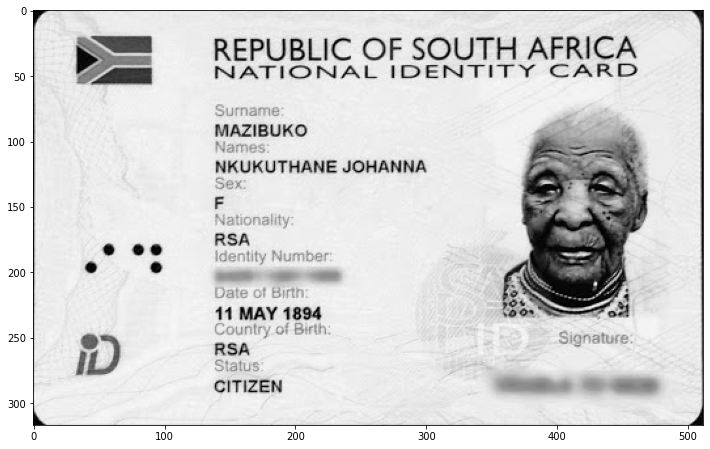

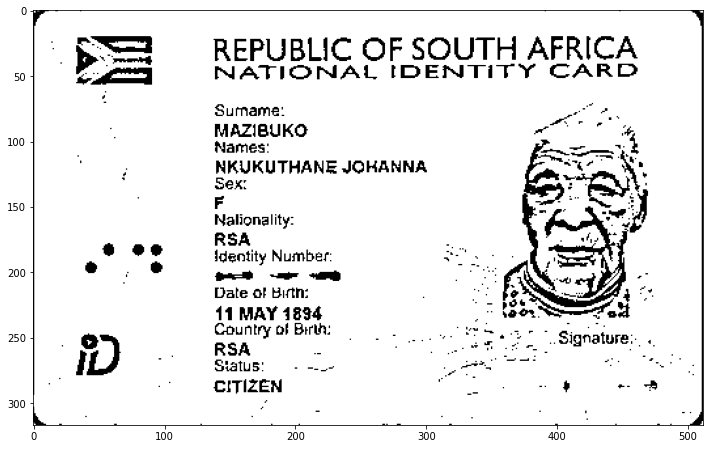

In [41]:
img = cv2.imread("id_3.png")
#plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray)
threshed = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,17)
display(threshed)
text1 = tess.image_to_data(threshed,output_type='data.frame')
text2 = tess.image_to_string(threshed)
print(text1)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

# __4. Obtaining the extracted data__

In [42]:
print(text2)

REPUBLIC 9 SOUTH AFRICA

NATIONA:

‘Sumame:
MAZIBUKO-

Names

NKUKUTHANE JOHANNA
Sex:

F

Nationality:

RSA

Sdeotity Number:

— a oe

Date of birtn:
14 MAY 1894
Country of Birth:
RSA
Status’
CITIZEN

 

 

IDENTITY CARD

     

i ie
HH
2 ”..Signature:

boas

 

